In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
ticker = 'AAPL'
df = yf.download(ticker, start='2020-08-01', end='2024-12-31')
df = df[['Close']]
N = 5
for i in range(1, N + 1):
    df[f'Close_lag_{i}'] = df['Close'].shift(i)
df.dropna(inplace=True)
X = df[[f'Close_lag_{i}' for i in range(1, N + 1)]]
y = df['Close']

C:\Users\anmol\AppData\Local\Temp\ipykernel_23328\2644305321.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-08-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

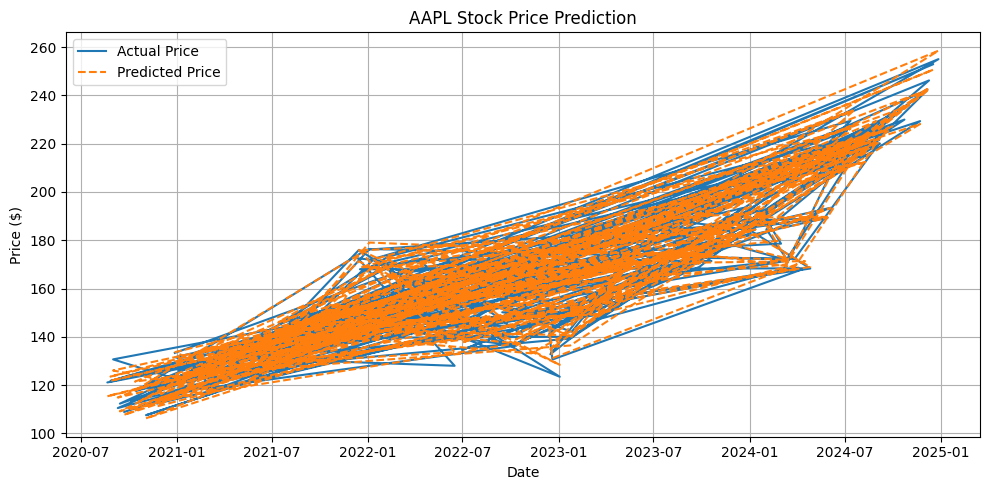

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', linestyle='--')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()